 # Innomatics Hackathon - Authored by, Swarnambika SY

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset and seek for necessary information
**Dataset Link - [here](https://drive.google.com/file/d/1nQ1F_Wtx1rvVIUL_rbDc0YpmH0yo7f7j/view?usp=sharing)**<br>
**About the data**
1. Input 
2. Output

In [3]:
df = pd.read_csv("dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.columns

Index(['input', 'output'], dtype='object')

In [6]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [7]:
df.shape

(1697, 2)

In [8]:
df= df.dropna(axis=0)
df.isnull().sum()

input     0
output    0
dtype: int64

# Data analysis

(array([272., 109.,  76., 152., 152., 219., 187., 195., 189., 145.]),
 array([-134.9628386 , -108.00597722,  -81.04911584,  -54.09225446,
         -27.13539308,   -0.1785317 ,   26.77832968,   53.73519106,
          80.69205244,  107.64891382,  134.6057752 ]),
 <BarContainer object of 10 artists>)

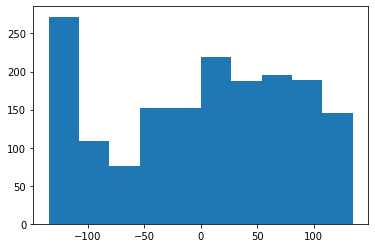

In [9]:
plt.hist(df['input'])

(array([125., 313., 382., 368., 130.,  74.,  67.,  57.,  86.,  94.]),
 array([-132.422167  , -105.73740078,  -79.05263456,  -52.36786834,
         -25.68310212,    1.0016641 ,   27.68643032,   54.37119654,
          81.05596276,  107.74072898,  134.4254952 ]),
 <BarContainer object of 10 artists>)

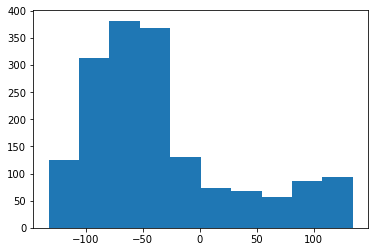

In [10]:
plt.hist(df['output'])

<AxesSubplot:xlabel='input', ylabel='Density'>

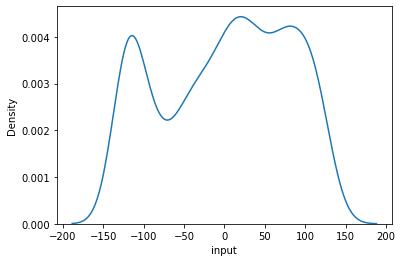

In [11]:
sns.distplot(df['input'],hist=False)

<AxesSubplot:xlabel='output', ylabel='Density'>

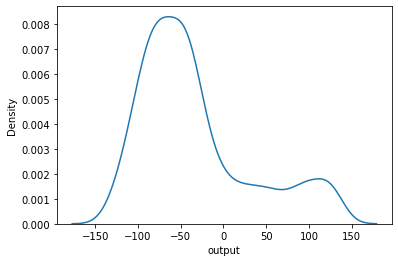

In [12]:
sns.distplot(df['output'],hist=False)

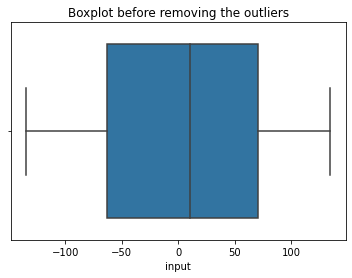

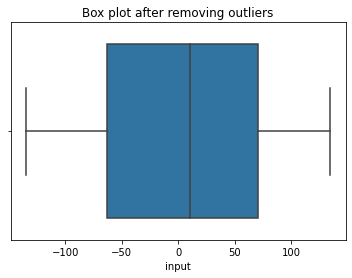

In [13]:
sns.boxplot(df['input'])
plt.title('Boxplot before removing the outliers')
plt.show()

def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

replace_outliers(df, 'input')
sns.boxplot(df['input'])
plt.title('Box plot after removing outliers')
plt.show()

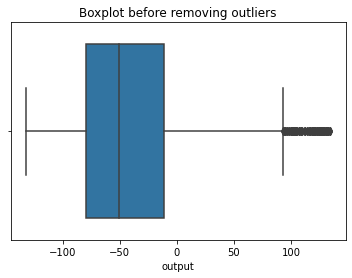

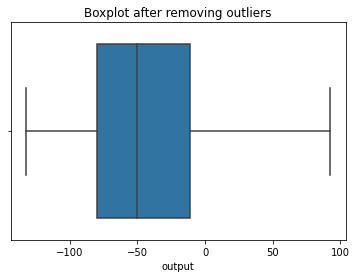

In [14]:
sns.boxplot(df['output'])
plt.title('Boxplot before removing outliers')
plt.show()

replace_outliers(df,'output')
sns.boxplot(df['output'])
plt.title('Boxplot after removing outliers')
plt.show()

Text(0.5, 1.0, 'Scatter plot')

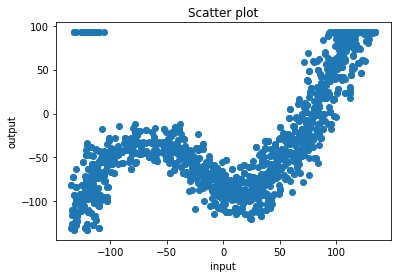

In [15]:
plt.scatter(df['input'],df['output'])
plt.xlabel('input')
plt.ylabel('output')
plt.title('Scatter plot')

# EDA Conclusion
* Null values are dropped from the dataset
* The input data ranges from -120 to +130 and most of the data are below -100
* The data range for output field is similar to input range and most of the data falls inbetween -50 and -75
* There were no outliers in the input field but the output field has many outliers
* The outliers were detected and removed using IQR

# Feature engineering

In [16]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler()
data = std_data.fit_transform([df['input']]).reshape(-1,1)
target = std_data.fit_transform([df['output']]).reshape(-1)

In [17]:
data = df[['input']]
target = df['output']

# Train test splitting of data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=101)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1272, 1)
(424, 1)
(1272,)
(424,)


# Model Building
# 1. Building a Linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn import metrics
print('Mean Absolute Error for Linear Regression: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for Linear Regression: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for Linear Regression: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for Linear Regression: ',metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error for Linear Regression:  40.14453562323994
Mean Squared Error for Linear Regression:  2603.618790675915
Root Mean Squared Error for Linear Regression:  51.025667959135184
R2 Score for Linear Regression:  28.120047621591425


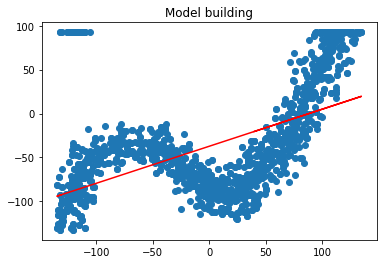

In [23]:
x_pred = lr.predict(X_train)
plt.scatter(df['input'],df['output'])
plt.plot(X_train['input'], x_pred, 'r')
plt.title("Model building")
plt.show()

# 2. Building a Decision tree model

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred = dt.predict(X_test)

In [26]:
print('Mean Absolute Error for Decision Tree: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for Decision Tree: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for Decision Tree: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for Decision Tree: ',metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error for Decision Tree:  13.950563281432755
Mean Squared Error for Decision Tree:  972.3443467450375
Root Mean Squared Error for Decision Tree:  31.18243651071926
R2 Score for Decision Tree:  73.15579930912095


# 3. Building a Extratree regressor Model

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor(n_estimators=100, random_state=0)
ext.fit(X_train, y_train)

ExtraTreesRegressor(random_state=0)

In [28]:
y_pred = ext.predict(X_test)

In [29]:
print('Mean Absolute Error for ETRegressor: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for ETRegressor: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for ETRegressor: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for ETRegressor: ',metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error for ETRegressor:  12.66054664863881
Mean Squared Error for ETRegressor:  765.2122401142835
Root Mean Squared Error for ETRegressor:  27.66246988456171
R2 Score for ETRegressor:  78.87424242912657


# Hyperparameter tuning using Grid Search for Extratree regressor

In [30]:
from sklearn.model_selection import GridSearchCV
                            
ext_gsc = GridSearchCV(
    estimator=ext,
    param_grid={'max_features': range(50,401,50),'min_samples_leaf': range(20,50,5)},
    scoring='r2',
    cv=5,return_train_score=True
)

grid_result = ext_gsc.fit(X_train, y_train)

In [31]:
best_ext = ExtraTreesRegressor(**grid_result.best_params_)
best_ext.fit(X_train, y_train)

ExtraTreesRegressor(max_features=50, min_samples_leaf=20)

In [32]:
y_pred = best_ext.predict(X_test)

In [33]:
print('Mean Absolute Error for HPT: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error for HPT: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error for HPT: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score for HPT: ',metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error for HPT:  22.011329611250396
Mean Squared Error for HPT:  1048.2023236381453
Root Mean Squared Error for HPT:  32.3759528606981
R2 Score for HPT:  71.06153428609755


# Final Conclusion:
* All the data were properly prepared and ready for model building.
* Initially I tried with linear regression which gives a R2 score of only 28%
* Then I tried using Decision tree regressor which gives a whooping increase of R2 score of 71%
* I also tried extra trees regressor that performs very well compared to other models.
* Finally I used grid search cross validation to perform the Hyperparameter tuning.
* It also concludes the same results.
* My final model gives an RMSE of 27.66 and R2 score 78%.